# Bagging Ensemble Learning


**Here only one type algorithm is used but every model will be trained for different data.**

![Bagging](https://www.researchgate.net/profile/Ryan-Byrne-2/publication/334404567/figure/fig4/AS:862185249071106@1582572390782/Illustrations-of-A-bagging-and-B-boosting-ensemble-algorithms.ppm)

![Bagging](https://lh4.googleusercontent.com/yreGz2Mc25obHnffMZXYAzEdyQ3KrFWFKAW2tBKgMw43tiLIkZYyyQgHkG2pNVWTVFUQVOzjPkvzK1wyotMKrhGHz-ONpkKA9jwrKVcUZrDMPqw4kibnkKdvb0-GI0g3PcXVcgbSfuU1uewGBw)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv("../Datasets/Iris/Iris.csv")
df = df.iloc[:, 1:]

encoder       = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])

df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]

df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


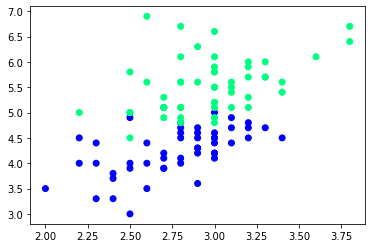

In [3]:
plt.scatter(df['SepalWidthCm'], df['PetalLengthCm'], c=df['Species'], cmap='winter')
plt.show()

In [4]:
# Taking only 10 rows for training
df       = df.sample(100)             # shuffel the data
df_train = df.iloc[:60, :].sample(10)  # for training
df_val   = df.iloc[60:80, :].sample(5) # for validation
df_test  = df.iloc[80:, :].sample(5)   # for testing

In [5]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

## Case 1 - Bagging
### Create Base DecisionTree Model-1

In [6]:
#####################
## Data for Tree 1 ##
#####################

# from 10 rows, we are taking 8, means we are taking 80% data. And py passing the "replace"
# parameter we can now get rows for multiple times. That means it is possible that there can be
# duplicate rows
df_bag = df_train.sample(8, replace=True) 

X = df_bag.iloc[:, 0:2]
y = df_bag.iloc[:, -1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
127,3.0,4.9,2
114,2.8,5.1,2
114,2.8,5.1,2
127,3.0,4.9,2
53,2.3,4.0,1
99,2.8,4.1,1
109,3.6,6.1,2
56,3.3,4.7,1


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [9]:
# create fully grown decision tree
dt_bag1 = DecisionTreeClassifier()

In [10]:
def evaluate(clf, X, y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

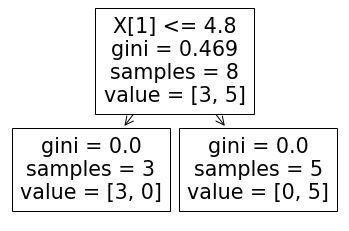

0.8


C:\Users\sayan\OneDrive\Documents\Data Science\datascience_venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\sayan\OneDrive\Documents\Data Science\datascience_venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


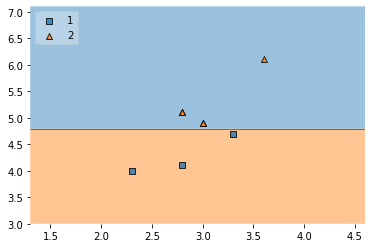

In [11]:
evaluate(dt_bag1, X, y)

### Create Base DecisionTree Model-2

In [18]:
# Data for Tree 2
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
121,2.8,4.9,2
121,2.8,4.9,2
56,3.3,4.7,1
97,2.9,4.3,1
121,2.8,4.9,2
121,2.8,4.9,2
127,3.0,4.9,2
140,3.1,5.6,2


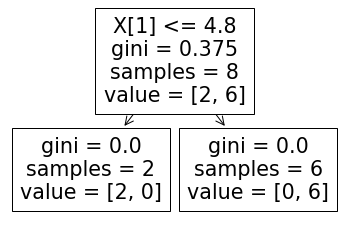

0.8


C:\Users\sayan\OneDrive\Documents\Data Science\datascience_venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\sayan\OneDrive\Documents\Data Science\datascience_venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


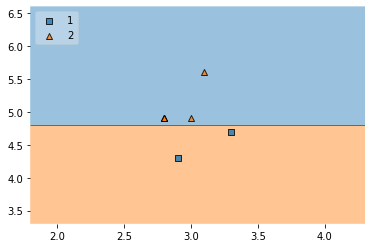

In [19]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2, X, y)

### Create Base DecisionTree Model-3

In [20]:
# Data for Tree 3
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
99,2.8,4.1,1
127,3.0,4.9,2
114,2.8,5.1,2
121,2.8,4.9,2
81,2.4,3.7,1
81,2.4,3.7,1
99,2.8,4.1,1
53,2.3,4.0,1


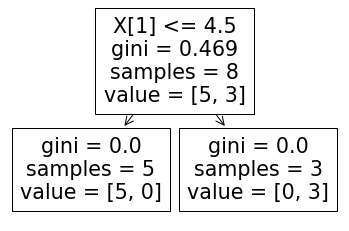

0.8


C:\Users\sayan\OneDrive\Documents\Data Science\datascience_venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\sayan\OneDrive\Documents\Data Science\datascience_venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


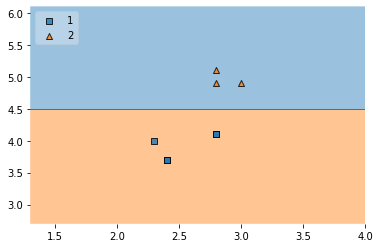

In [21]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

## Aggregation (Prediction)

In [22]:
df_test

,SepalWidthCm,PetalLengthCm,Species
108,2.5,5.8,2
90,2.6,4.4,1
78,2.9,4.5,1
67,2.7,4.1,1
63,2.9,4.7,1


In [23]:
print("Predictor 1", dt_bag1.predict(np.array([3.6,6.1]).reshape(1,2)))
print("Predictor 2", dt_bag2.predict(np.array([3.6,6.1]).reshape(1,2)))
print("Predictor 3", dt_bag3.predict(np.array([3.6,6.1]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


C:\Users\sayan\OneDrive\Documents\Data Science\datascience_venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\sayan\OneDrive\Documents\Data Science\datascience_venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\sayan\OneDrive\Documents\Data Science\datascience_venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [24]:
print("Predictor 1", dt_bag1.predict(np.array([3.4, 4.5]).reshape(1,2)))
print("Predictor 2", dt_bag2.predict(np.array([3.4, 4.5]).reshape(1,2)))
print("Predictor 3", dt_bag3.predict(np.array([3.4, 4.5]).reshape(1,2)))

Predictor 1 [1]
Predictor 2 [1]
Predictor 3 [1]


C:\Users\sayan\OneDrive\Documents\Data Science\datascience_venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\sayan\OneDrive\Documents\Data Science\datascience_venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\sayan\OneDrive\Documents\Data Science\datascience_venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Pasting (Bagging Type 1)

In [25]:
# row sampling withour replacement
df_train

,SepalWidthCm,PetalLengthCm,Species
99,2.8,4.1,1
109,3.6,6.1,2
53,2.3,4.0,1
121,2.8,4.9,2
127,3.0,4.9,2
81,2.4,3.7,1
97,2.9,4.3,1
140,3.1,5.6,2
56,3.3,4.7,1
114,2.8,5.1,2


In [26]:
# here no row is repeating but earlier it's doing
df_train.sample(8)

,SepalWidthCm,PetalLengthCm,Species
121,2.8,4.9,2
99,2.8,4.1,1
53,2.3,4.0,1
81,2.4,3.7,1
127,3.0,4.9,2
140,3.1,5.6,2
97,2.9,4.3,1
114,2.8,5.1,2


## Random Subspaces (Bagging Type 2)
You do **column sampling** with row replacement or without row replacement.

In [27]:
df1 = pd.read_csv("../Datasets/Iris/Iris.csv")
df1 = df1.sample(10)
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
14,15,5.8,4.0,1.2,0.2,Iris-setosa
132,133,6.4,2.8,5.6,2.2,Iris-virginica
138,139,6.0,3.0,4.8,1.8,Iris-virginica
105,106,7.6,3.0,6.6,2.1,Iris-virginica
72,73,6.3,2.5,4.9,1.5,Iris-versicolor
2,3,4.7,3.2,1.3,0.2,Iris-setosa
106,107,4.9,2.5,4.5,1.7,Iris-virginica
17,18,5.1,3.5,1.4,0.3,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
56,57,6.3,3.3,4.7,1.6,Iris-versicolor


In [28]:
# column sampling
df1.sample(2, replace=True, axis=1)

,PetalLengthCm,PetalWidthCm
14,1.2,0.2
132,5.6,2.2
138,4.8,1.8
105,6.6,2.1
72,4.9,1.5
2,1.3,0.2
106,4.5,1.7
17,1.4,0.3
8,1.4,0.2
56,4.7,1.6


## Random Patches (Bagging Type 3)
**row sampling and column sampling together**

In [29]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
14,15,5.8,4.0,1.2,0.2,Iris-setosa
132,133,6.4,2.8,5.6,2.2,Iris-virginica
138,139,6.0,3.0,4.8,1.8,Iris-virginica
105,106,7.6,3.0,6.6,2.1,Iris-virginica
72,73,6.3,2.5,4.9,1.5,Iris-versicolor
2,3,4.7,3.2,1.3,0.2,Iris-setosa
106,107,4.9,2.5,4.5,1.7,Iris-virginica
17,18,5.1,3.5,1.4,0.3,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
56,57,6.3,3.3,4.7,1.6,Iris-versicolor


In [30]:
# column sampling and row sampling
df1.sample(8, replace=True).sample(2, replace=True, axis=1)

,SepalWidthCm,PetalWidthCm
56,3.3,1.6
14,4.0,0.2
106,2.5,1.7
72,2.5,1.5
14,4.0,0.2
72,2.5,1.5
14,4.0,0.2
17,3.5,0.3


## Bagging Classifier

In [31]:
from sklearn.datasets        import make_classification
from sklearn.metrics         import accuracy_score
from sklearn.ensemble        import BaggingClassifier
from sklearn.tree            import DecisionTreeClassifier
from sklearn.svm             import SVC
from sklearn.model_selection import train_test_split

In [32]:
X,y = make_classification(n_samples=10000, n_features=10, n_informative=3)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

### Single DecisionTree Classifier

In [34]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print("Decision Tree accuracy",accuracy_score(y_test,y_pred))

Decision Tree accuracy 0.9305


### Bagging Using DecisionTree

In [35]:
bag = BaggingClassifier(
    base_estimator = DecisionTreeClassifier(),
    n_estimators   = 500, # 500 decision tree models
    max_samples    = 0.5,
    bootstrap      = True,
    random_state   = 42
)

In [36]:
bag.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.5,
                  n_estimators=500, random_state=42)

In [37]:
y_pred = bag.predict(X_test)
accuracy_score(y_test, y_pred)

0.952

In [38]:
# because of max_samples, we are getting total this number of samples to train
# 0 means the first of the based 500 models
bag.estimators_samples_[0].shape

(4000,)

In [39]:
# 10 columns we are using because we are not doing column sampling
# 0 means the first of the based 500 models
bag.estimators_features_[0].shape

(10,)

### Bagging Using SVM

In [40]:
bag = BaggingClassifier(
    base_estimator = SVC(),
    n_estimators   = 500,
    max_samples    = 0.25,
    bootstrap      = True,
    random_state   = 42
)

In [41]:
bag.fit(X_train,y_train)
y_pred = bag.predict(X_test)
print("Bagging using SVM", accuracy_score(y_test,y_pred))

Bagging using SVM 0.9155


### Pasting

In [42]:
bag = BaggingClassifier(
    base_estimator = DecisionTreeClassifier(),
    n_estimators   = 500,
    max_samples    = 0.25,
    bootstrap      = False,  # Sampling without Replacement
    random_state   = 42,
    verbose        = 1,
    n_jobs         = -1
)

In [43]:
bag.fit(X_train,y_train)
y_pred = bag.predict(X_test)
print("Pasting classifier",accuracy_score(y_test,y_pred))

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    2.5s remaining:   12.7s


Pasting classifier 0.952


[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    2.7s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   2 out of  12 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=12)]: Done  12 out of  12 | elapsed:    0.0s finished


### Random Subspaces

In [44]:
bag = BaggingClassifier(
    base_estimator     = DecisionTreeClassifier(),
    n_estimators       = 500,
    max_samples        = 1.0,   # all rows
    bootstrap          = False, # sampling without replacement
    max_features       = 0.5,   # 50% column will be used
    bootstrap_features = True,  # column sampling
    random_state       = 42
)

In [45]:
bag.fit(X_train, y_train)
y_pred = bag.predict(X_test)
print("Random Subspaces classifier",accuracy_score(y_test,y_pred))

Random Subspaces classifier 0.9475


In [46]:
bag.estimators_samples_[0].shape

(8000,)

In [47]:
bag.estimators_features_[0].shape

(5,)

### Random Patches

In [48]:
bag = BaggingClassifier(
    base_estimator     = DecisionTreeClassifier(),
    n_estimators       = 500,
    max_samples        = 0.25,
    bootstrap          = True,
    max_features       = 0.5,
    bootstrap_features = True,
    random_state       = 42
)

In [49]:
bag.fit(X_train,y_train)
y_pred = bag.predict(X_test)
print("Random Patches classifier",accuracy_score(y_test,y_pred))

Random Patches classifier 0.941


### OOB Score (Out of Bag Samples)

It is possible that some rows do not trained by any one decision tree or base models. Also there is a possibility that some rows are trained by multiple based models. Statistical proven that around 63% rows is trained by the based models. The rest rows are not trained by any one of the based models. 

In [50]:
bag = BaggingClassifier(
    base_estimator = DecisionTreeClassifier(),
    n_estimators   = 500,
    max_samples    = 0.25,
    bootstrap      = True,
    oob_score      = True,  # enable OOB Scoring
    random_state   = 42
)

In [51]:
bag.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.25,
                  n_estimators=500, oob_score=True, random_state=42)

In [52]:
bag.oob_score_

0.951375

In [53]:
y_pred = bag.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))

Accuracy 0.953


### Bagging Tips

- Bagging generally gives better results than Pasting
- Good results come around the 25% to 50% row sampling mark
- Random patches and subspaces should be used while dealing with high dimensional data
- To find the correct hyperparameter values we can do GridSearchCV/RandomSearchCV

### Applying GridSearchCV

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
parameters = {
    'n_estimators': [50,100,500], 
    'max_samples': [0.1,0.4,0.7,1.0],
    'bootstrap' : [True,False],
    'max_features' : [0.1,0.4,0.7,1.0]
}

In [56]:
search = GridSearchCV(BaggingClassifier(), parameters, cv=5, n_jobs=-1)

search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=BaggingClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_features': [0.1, 0.4, 0.7, 1.0],
                         'max_samples': [0.1, 0.4, 0.7, 1.0],
                         'n_estimators': [50, 100, 500]})

In [57]:
search.best_params_
search.best_score_

0.953

In [58]:
search.best_params_

{'bootstrap': True,
 'max_features': 0.7,
 'max_samples': 0.7,
 'n_estimators': 500}

## Bagging Regressor

In [59]:
from sklearn import datasets

boston             = datasets.load_boston()
X_boston, Y_boston = boston.data, boston.target
print('Dataset features names : '+ str(boston.feature_names))
print('Dataset features size : '+ str(boston.data.shape))
print('Dataset target size : '+ str(boston.target.shape))

Dataset features names : ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Dataset features size : (506, 13)
Dataset target size : (506,)


C:\Users\sayan\OneDrive\Documents\Data Science\datascience_venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets i

In [60]:
from sklearn.linear_model    import LinearRegression
from sklearn.neighbors       import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree            import DecisionTreeRegressor
from sklearn.metrics         import r2_score

In [61]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_boston, Y_boston , train_size=0.80, test_size=0.20, random_state=123)
print('Train/Test Sets Sizes : ',X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Train/Test Sets Sizes :  (404, 13) (102, 13) (404,) (102,)


In [62]:
lr  = LinearRegression()
dt  = DecisionTreeRegressor()
knn = KNeighborsRegressor()

In [63]:
lr.fit(X_train,  Y_train)
dt.fit(X_train,  Y_train)
knn.fit(X_train, Y_train)

KNeighborsRegressor()

In [64]:
y_pred1 = lr.predict(X_test)
y_pred2 = dt.predict(X_test)
y_pred3 = knn.predict(X_test)

In [66]:
print("R^2 score for LR",r2_score(Y_test,y_pred1))
print("R^2 score for DT",r2_score(Y_test,y_pred2))
print("R^2 score for KNN",r2_score(Y_test,y_pred3))

R^2 score for LR 0.6592466510354096
R^2 score for DT 0.4231516940161908
R^2 score for KNN 0.5475962186976784


In [67]:
from sklearn.ensemble import BaggingRegressor

bag_regressor = BaggingRegressor(random_state=1)
bag_regressor.fit(X_train, Y_train)

BaggingRegressor(random_state=1)

In [68]:
Y_preds = bag_regressor.predict(X_test)

print('Training Coefficient of R^2 : %.3f'%bag_regressor.score(X_train, Y_train))
print('Test Coefficient of R^2 : %.3f'%bag_regressor.score(X_test, Y_test))

Training Coefficient of R^2 : 0.980
Test Coefficient of R^2 : 0.818


In [69]:
%%time

n_samples = boston.data.shape[0]
n_features = boston.data.shape[1]

params = {'base_estimator': [None, LinearRegression(), KNeighborsRegressor()],
          'n_estimators': [20,50,100],
          'max_samples': [0.5,1.0],
          'max_features': [0.5,1.0],
          'bootstrap': [True, False],
          'bootstrap_features': [True, False]}

bagging_regressor_grid = GridSearchCV(BaggingRegressor(random_state=1, n_jobs=-1), param_grid =params, cv=3, n_jobs=-1, verbose=1)
bagging_regressor_grid.fit(X_train, Y_train)

print('Train R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_train, Y_train))
print('Test R^2 Score : %.3f'%bagging_regressor_grid.best_estimator_.score(X_test, Y_test))
print('Best R^2 Score Through Grid Search : %.3f'%bagging_regressor_grid.best_score_)
print('Best Parameters : ',bagging_regressor_grid.best_params_)

Fitting 3 folds for each of 144 candidates, totalling 432 fits
Train R^2 Score : 0.983
Test R^2 Score : 0.805
Best R^2 Score Through Grid Search : 0.871
Best Parameters :  {'base_estimator': None, 'bootstrap': True, 'bootstrap_features': False, 'max_features': 1.0, 'max_samples': 1.0, 'n_estimators': 50}
CPU times: total: 281 ms
Wall time: 5.8 s
